
**The MNIST data set, or the Modified National Institute of Standards and Technology :**

Data set, is a large collection of handwritten images used to train computer vision and image processing models such as the CNN.

It is a common data set to start with and is basically like the “hello world” data set of computer vision.

The data set contains 60,000 training images and 10,000 testing images of
handwritten digits 0-9, each with a dimension of 28x28 pixels.

In [2]:
import tensorflow as tf
import keras
from keras.datasets import mnist

In [3]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten , Input
from keras.layers import Conv2D, MaxPooling2D

In [4]:
from keras import backend as K
import numpy as np

One pass of the entire data set through the model is called an **epoch**.

The **batch size** is how many data entries pass through the model in one iteration.
In this case, the training data passes through the model 128 entries at a time until all of the entries have passed through, marking the end of one epoch.

The **number of classes** is 10 to represent
each of the 10 digits from 0-9.
These variables are also known as **hyperparameters** : parameters that are set before the training process

In [5]:
batch_size = 128
n_classes = 10
n_epochs = 15
im_row, im_col = 28,28


In [6]:
(xtrain , ytrain), (xtest, ytest)  =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

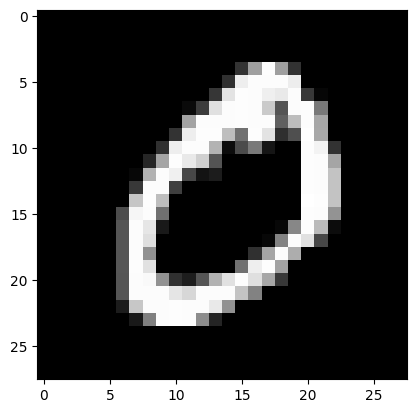

In [8]:
plt.imshow(xtrain[1], cmap='gray')
plt.show()

In [9]:
print(f' Training dataset : {xtrain.shape}\n Testing dataset : {xtest.shape}')

 Training dataset : (60000, 28, 28)
 Testing dataset : (10000, 28, 28)


A property of images is that there are three dimensions for color images and two for grey scale images.

Grey scale images are simply row x column since they don’t have color
channels.

Color images, on the other hand, can be formatted as **row x column x channel**
or **channel x row x column**.

For color images, the variable channel is 3 because you want
to know the pixel values for red, green, and blue (**RGB**)

In this case, it’s grey scale, so no need to worry about the channel variable

In [10]:
if K.image_data_format() =='channels_first':
  xtrain = xtrain.reshape(xtrain.shape[0], 1, im_row, im_col)
  xtest = xtest.reshape(xtest.shape[0], 1, im_row, im_col)
  input_shape=(1, im_row, im_col)
else:
  xtrain = xtrain.reshape(xtrain.shape[0], im_row, im_col , 1)
  xtest = xtest.reshape(xtest.shape[0],  im_row, im_col , 1)
  input_shape=( im_row, im_col , 1)


Converting x_train and x_test to float32 and applying min-max
normalization by dividing by 255.

For y_train and y_test,  convert them to a
one-hot encoded format

In [11]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain /= 255
xtest /= 255


In [12]:
ytrain=keras.utils.to_categorical(ytrain, n_classes)
ytest=keras.utils.to_categorical(ytest, n_classes)

now  define a deep learning model and add layers to it

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D( pool_size= (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
from keras.losses  import CategoricalCrossentropy

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics='accuracy')

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [21]:
from keras.callbacks import ModelCheckpoint

In [24]:
checkpoint= ModelCheckpoint(filepath='MNIST_using_keras.h5', verbose= 0, save_only_best=True)

In [25]:
model.fit(xtrain , ytrain ,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(xtest, ytest),
          callbacks=[checkpoint])

Epoch 1/15
469/469 [==============================] - 147s 309ms/step - loss: 0.2330 - accuracy: 0.9299 - val_loss: 0.0532 - val_accuracy: 0.9823
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - 140s 298ms/step - loss: 0.0828 - accuracy: 0.9751 - val_loss: 0.0366 - val_accuracy: 0.9876
Epoch 3/15
469/469 [==============================] - 141s 300ms/step - loss: 0.0618 - accuracy: 0.9809 - val_loss: 0.0389 - val_accuracy: 0.9870
Epoch 4/15
469/469 [==============================] - 138s 295ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0339 - val_accuracy: 0.9891
Epoch 5/15
469/469 [==============================] - 139s 297ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0278 - val_accuracy: 0.9909
Epoch 6/15
469/469 [==============================] - 144s 307ms/step - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0284 - val_accuracy: 0.9917
Epoch 7/15
469/469 [==============================] - 142s 303ms/step - loss: 0.0339 - accuracy: 0.9890 - val_loss: 0.0258 - val_accuracy: 0.9920
Epoch 8/15
469/469 [==============================] - 143s 305ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0300 - val_accura

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
predicted_y=model.predict(xtest)

313/313 [==============================] - 13s 42ms/step


In [28]:
auc=roc_auc_score(np.round(predicted_y), ytest)

In [29]:
print(f'AUC : {auc: 0.2%}')

AUC :  99.60%


As the image passes through the convolutional layers, its dimensions get reduced 
and the patterns become more apparent.

In [30]:
from keras import models

In [ ]:
layers=[layer.output for layer in model.layers[:4]]
model_layers=models.Model(inputs=model.input , outputs= layers)
activations= model_layers.predict(xtrain)

1311/1875 [===================>..........] - ETA: 21s